[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-02.ipynb)

* [부스트코스] 프로젝트로 배우는 데이터사이언스 > 3. 탐색한 데이터로 모델성능 개선 의 파일입니다.

https://www.edwith.org/boostcourse-ds-511/joinLectures/40944

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Engineering
### 수치형 변수를 범주형 변수로 만들기

연속형 범수를 그대로 넣을 경우, outlier에 의해서 overfitting되기 쉽다.  
따라서 범주형 변수로 바꿔서 넣어준다 (Pregnancies, Age)

In [4]:
df["Pregnancies_high"]= df['Pregnancies'] > 6
df[["Pregnancies_high", "Pregnancies"]].head()

,Pregnancies_high,Pregnancies
0,False,6
1,False,1
2,True,8
3,False,1
4,False,0


In [5]:
# One-Hot-Encoding
# 수치 => 범주 => 수치
df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<AxesSubplot:xlabel='Age_high', ylabel='count'>

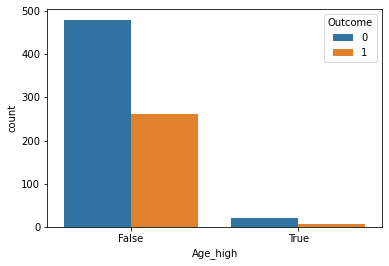

In [6]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

### 결측치 다루기

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin_nan", "Insulin"]].head()

,Insulin_nan,Insulin
0,NaN,0
1,NaN,0
2,NaN,0
3,94.0,94
4,168.0,168


In [10]:
df["Insulin_nan"].isnull().sum()

374

In [11]:
# 결측치의 비율
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [12]:
# NAN처리 했을 때와 안 했을 때 데이터의 차이
df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].agg(["mean", "median"])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [13]:
# 결측치 채우기
df.loc[(df["Outcome"] ==0) & (df["Insulin_nan"].isnull()) , "Insulin_nan"] = 102.5
df.loc[(df["Outcome"] ==1) & (df["Insulin_nan"].isnull()) , "Insulin_nan"] = 169.5

### 정규분포 만들기
* 왜도, 첨도

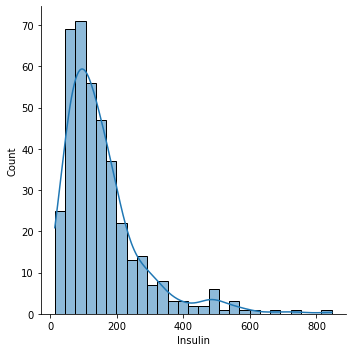

In [14]:
sns.displot(df.loc[df["Insulin"]>0, "Insulin"], kde=True)

-> Insulin 변수는 왼쪽으로 치우쳐 있음

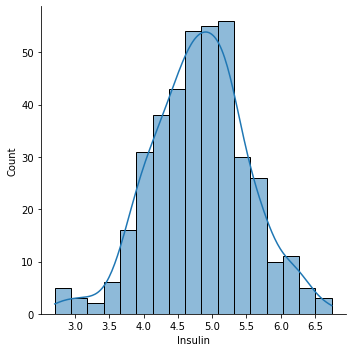

In [15]:
# log 변환
sns.displot(np.log(df.loc[df["Insulin"]>0, "Insulin"] + 1), kde=True)

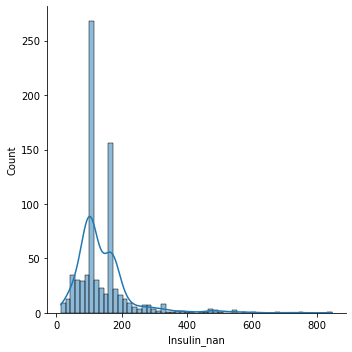

In [16]:
sns.displot(df["Insulin_nan"], kde=True)

뾰족한 부분은 결측치 처리에 의한 부분

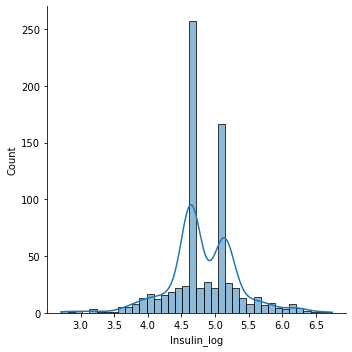

In [17]:
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.displot(df["Insulin_log"], kde=True)

### 파생변수 만들기
* EDA에서 해본 상관분석을 바탕으로 파생변수를 생성합니다.

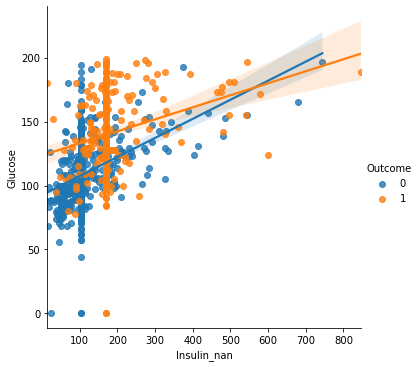

In [18]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")

In [19]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [20]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


-> Insulin, Glucose가 모두 낮을 때에는 발병률이 확실히 낮다는 것을 확인 가능

### 이상치(outlier) 다루기
* https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

<AxesSubplot:xlabel='Insulin_nan'>

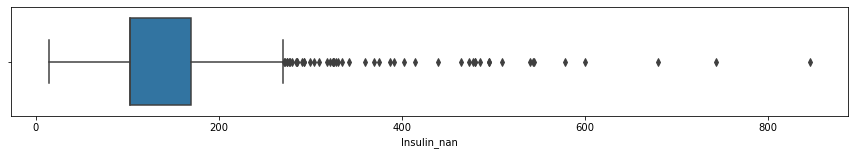

In [21]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=df["Insulin_nan"])

In [22]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [23]:
Q3 = df["Insulin_nan"].quantile(0.75)
Q1 = df["Insulin_nan"].quantile(0.25)
IQR = Q3 - Q1
IQR

67.0

In [24]:
OUT = Q3 + (IQR*1.5)
OUT

270.0

In [25]:
df[df["Insulin_nan"]>OUT].shape

(51, 16)

-> 51개를 모두 삭제하기에는 데이터가 너무 많다

In [26]:
df[df["Insulin_nan"]>600].shape

(3, 16)

### Scaling
* https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

숫자의 범위가 크고, 변수별로 범위에 차이가 클 때 사용하면 성능이 좋아진다

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Glucose', 'DiabetesPedigreeFunction']])
scale = scaler.transform(df[['Glucose', 'DiabetesPedigreeFunction']])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [28]:
# df[["Glucose", "DiabetesPedigreeFunction"]] = scale
# df[["Glucose", "DiabetesPedigreeFunction"]].head()

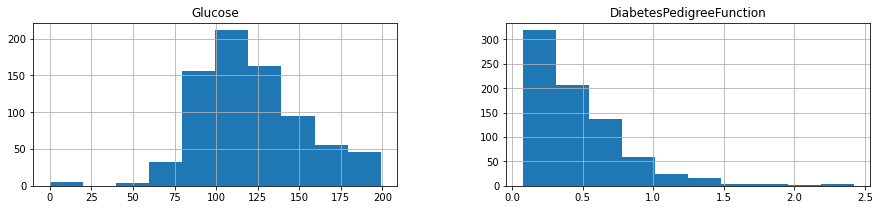

In [29]:
h = df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize=(15, 3))

## CSV 파일로 저장하기

In [52]:
df.to_csv("data/diabetes_feature.csv", index=False)

In [ ]:
pd.read_csv("data/")

## 학습, 예측 데이터셋 나누기

In [30]:
split_count = int(df.shape[0] * 0.8)
train = df[:split_count].copy()
train.shape

(614, 16)

In [31]:
# 이상치 4개 제거
train = train[train["Insulin_nan"]<600]
train.shape

(610, 16)

In [32]:
test = df[split_count:].copy()
test.shape

(154, 16)

## 학습, 예측에 사용할 컬럼

In [33]:
# 학습과 예측에 사용할 설명변수 목록  
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

In [34]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,148,72,35,33.6,0.627,50,False,169.5,False
1,85,66,29,26.6,0.351,31,False,102.5,True
2,183,64,0,23.3,0.672,32,True,169.5,False
3,89,66,23,28.1,0.167,21,False,94.0,True
4,137,40,35,43.1,2.288,33,False,168.0,False


## 정답값이자 예측해야 될 값

In [35]:
label_name = "Outcome"
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [36]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,148,72,35,33.6,0.627,50,False,169.5,False
1,85,66,29,26.6,0.351,31,False,102.5,True
2,183,64,0,23.3,0.672,32,True,169.5,False
3,89,66,23,28.1,0.167,21,False,94.0,True
4,137,40,35,43.1,2.288,33,False,168.0,False


In [37]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [38]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,138,74,26,36.1,0.557,50,True,144.0,False
615,106,72,0,25.8,0.207,27,False,102.5,False
616,117,96,0,28.7,0.157,30,False,102.5,False
617,68,62,13,20.1,0.257,23,False,15.0,True
618,112,82,24,28.2,1.282,50,True,169.5,False


In [39]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 머신러닝 알고리즘 가져오기

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [41]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [42]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

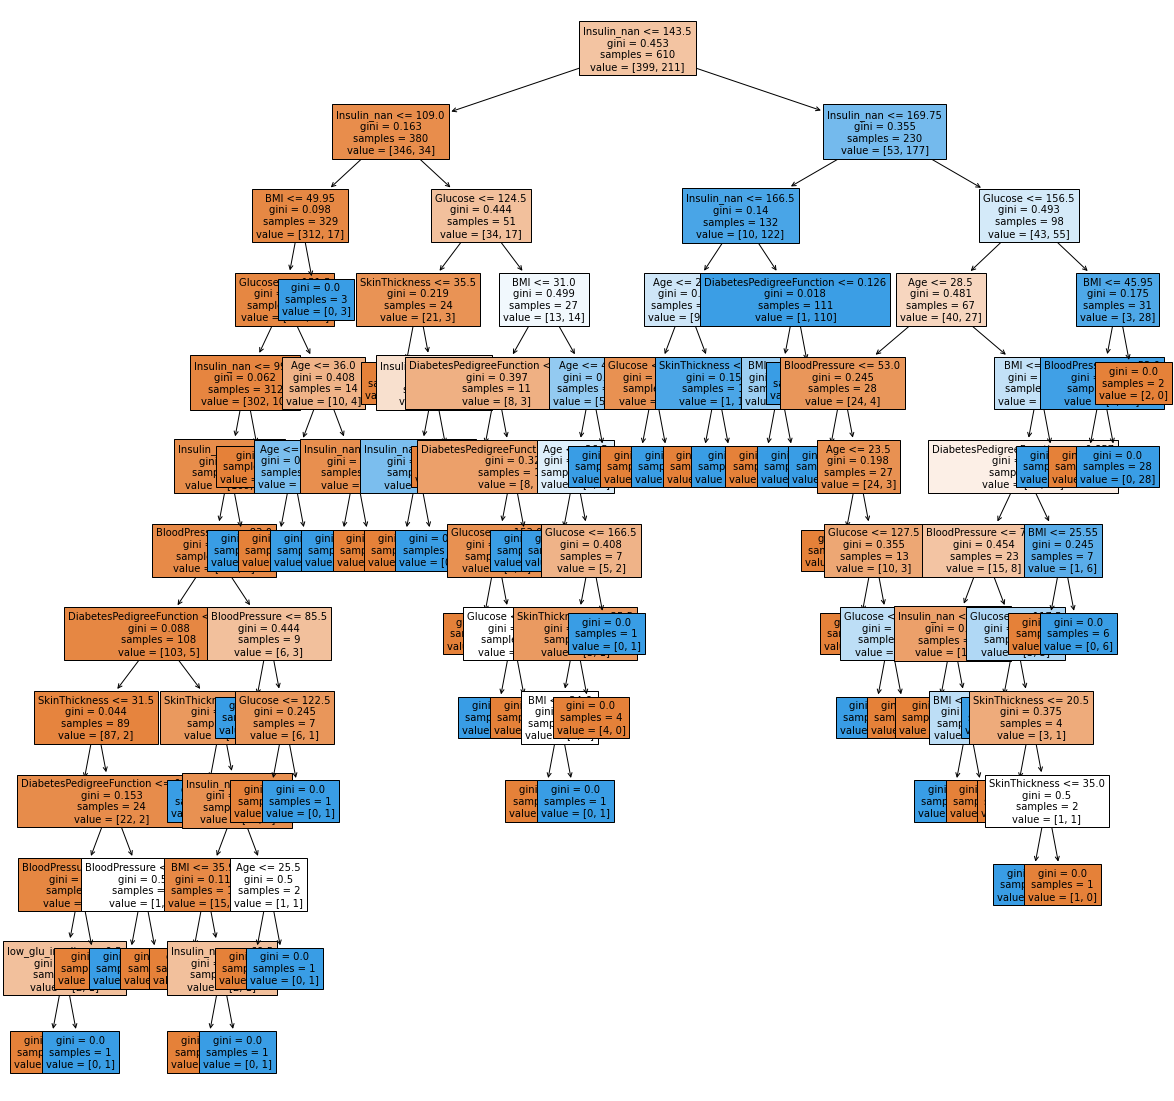

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

In [44]:
# graphviz 를 통해 시각화 합니다.
# graphviz 는 별도의 설치가 필요합니다. 
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주셔야 합니다.
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model,
#                            feature_names = feature_names,
#                            filled=True)
# graphviz.Source(dot_tree)

In [45]:
model.feature_importances_

array([0.10720708, 0.03829317, 0.02739544, 0.08008031, 0.02662991,
       0.08272508, 0.        , 0.63283861, 0.0048304 ])

<AxesSubplot:>

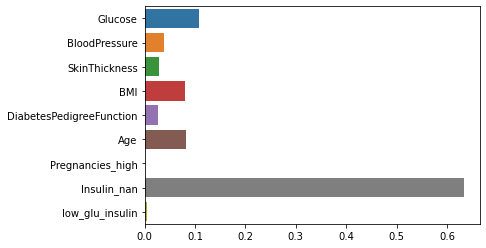

In [46]:
# Insulin에 대한 결측치 처리를 완료하자, Insulin의 중요도가 상승했다
sns.barplot(x=model.feature_importances_, y=feature_names)

-> Pregnancies는 범주형 변수로 변환했을 때 학습에 큰 영향을 주지 않앗다

## 정확도(Accuracy) 측정하기

In [47]:
# 44(원본데이터) => 39(Pregnancies 범주화) => 49(Age 범주화)
# => 23(인슐린 결측치 평균으로 대체) => 16(인슐린 결측치 중앙값으로 대체)
# => 15(인슐린과 글루코스 상관계수로 파생변수 생성)
# => 15(인슐린 > 600 이상치 제거)
diff_count = abs(y_predict - y_test).sum()
print(diff_count)

15


In [48]:
# 71 => 85(인슐린 결측치 평균으로 대체) => 89(인슐린 결측치 중앙값으로 대체)
# => 90(인슐린과 글루코스 상관계수로 파생변수 생성)
# => 90(인슐린 > 600 이상치 제거)
(len(y_test) - diff_count) / len(y_test) * 100

90.25974025974025

In [49]:
# model.score로 계산
model.score(X_test, y_test) * 100

90.25974025974025